# Data Science Certification: Census data to predict income band

You will be working with census data with various from credit card applications. Your goal is to develop a classifier that is able to correctly predict the person's level of education. The data are already split into training and test sets ("cca-census-income.csv" and "cca-census-income-test.csv" respectively). In order to demonstrate that your solution is optimal, you will need to also include your exploratory analyses of the dataset, evaluations of alternative algorithms, and parameter optimisations. You should also feel free to explore new algorithms and to use publicly available resources and solutions such as those listed on the dataset webpage as a reference.

You will be evaluated and given feedback on:
- Your problem-solving approach.
- Your code.
- The justifications you give for your decisions.
- The quality and performance of your solution.
- The presentation of your solution.

## Step 1: Load the libraries

Libraries to consider:
- Powerful Python libraries for data manipulation and arrays: e.g. scipy, pandas, numpy
- Plotting libraries: e.g. matplotlib, seaborn, Plotly or ggplot (R library supported in Python)
- Machine Learning libraries: e.g. sklearn, keras (for neural nets ) 

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from itertools import cycle

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 8  # that's default image size for this 
import collections
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
import seaborn as sns; #sns.set(style="ticks", color_codes=True) 
sns.set_style("whitegrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

/Users/francescobattocchio/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/francescobattocchio/py3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Perform "sanity" checks by printing the contents of your input data in-line or in a tabular format, and check the dimensionality of your data. In addition, check and detect any format issues, missing values or anomalies. Report your findings

In [2]:
pd.set_option('display.max_columns', 50)
fileTrain = 'data/cca-census-income.csv'
fileTest = 'data/cca-census-income-test.csv'
# import csv file without header
df = pd.read_csv(fileTrain, header=None, skipinitialspace=True)
n,m = df.shape
print('Train data set shape:', df.shape)
print('Missing values in Train set:', df.isnull().values.sum().sum())
df.head()

Train data set shape: (199523, 49)
Missing values in Train set: 874


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1,73,Not in universe,0,0,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.,0,0,97,0,4,130,High school graduate
1,2,58,Self-employed-not incorporated,4,34,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.,1160,0,148,104,10,110,Some college but no degree
2,3,18,Not in universe,0,0,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.,0,0,97,0,1,136,10th grade
3,4,9,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,0,0,94,0,3,140,Children
4,5,10,Not in universe,0,0,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.,0,0,94,0,9,128,Children


### Summary
Although the column in the original data set don't have a label, it is clear that the level of education is in the last column. We have a small number of missing data detected as NaN values. It is clear however that more missing information might be represented in form of '0' or '?'.

There are both numerical and categorical string data. Many numerical data are integer numbers, which suggests that they may also represent categories rather than a quantitative value.

To help visualisation of feature columns are renamed "var_i", while the target column is renamed as "education". Descriptive statistics is shown below to have more insight on the numerical data. It is observed that "var_0" is simply an index of the observation and can be eliminated, and that some features are dominated by '0'.

In [3]:
col_num = df.shape[1]
col_names = ['var_%d' % n for n in range(col_num-1)]
col_names.append('education')
df.columns = col_names
df.describe()

,var_0,var_1,var_3,var_4,var_5,var_16,var_17,var_18,var_24,var_30,var_36,var_38,var_39,var_40,var_42,var_43,var_44,var_45,var_46,var_47
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.0,199523.000000,199523.000000,199523.000000,199523.000000
mean,99762.000000,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672,352.113496,0.0,119.189402,46.169855,20.846238,125.024153
std,57597.473217,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001,525.343615,0.0,24.882811,48.723548,18.290950,14.721625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.0,94.000000,0.000000,1.000000,100.000000
25%,49881.500000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000,0.0,96.000000,0.000000,5.000000,112.000000
50%,99762.000000,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000,0.0,105.000000,16.000000,10.000000,125.000000
75%,149642.500000,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000,699.000000,0.0,148.000000,104.000000,40.000000,138.000000
max,199523.000000,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,2167.000000,0.0,149.000000,104.000000,61.000000,150.000000


## Step 2: Mine, pre-process and explore the data

Data mining and exploratory data analysis (EDA) is a crucial step in the ML model building process and is essential for verifying and improving the quality of the input data. Consider applying the following: 
- splitting the data into input features and outputs.
- pre-processing: scale, normalise, transform the data if required; decide how to handle categorical variables, missing values (e.g. by removing rows or columns, imputation with zeros or centrality metrics) and outliers.
- dimensionality reduction or feature extraction: check for feature correlation and decide whether to apply dimensionality reduction and/or feature extraction.
- EDA and visualisation: explore and visualise the data using a variety of plots such as scatterplots, barplots, boxplots, heatmaps.

### 2.1 Eliminate repeated data
Features with many repeated data should be eliminated as they don't carry significant information. 
As first step the columns with a value repeated for more than 75% are found and the repeated value displayed

In [4]:
# Some columns have zero std or very small std, which suggests that there are may repeated values. Let's check...
# all data column names
col_names = np.array(col_names)
# Check how many columns have more than 75% repeated values
flag = np.zeros(m)
item = np.ndarray(m, dtype=object)
for i in range(len(col_names)):
    flag[i] = df[col_names[i]].value_counts().max()   
    item[i] = df[col_names[i]].value_counts().index[0]
flag = flag>0.75*df.shape[0]
print('Columns with more than 75% repeated values=', flag.sum())
print('Repeated items: \n', item[flag])

Columns with more than 75% repeated values= 20
Repeated items: 
 [0 'Not in universe' 'White' 'All other' 'Not in universe'
 'Not in universe' 0 0 0 'Not in universe' 'Not in universe'
 'United-States' 'United-States' 'United-States'
 'Native- Born in the United States' 0 'Not in universe' 2 '- 50000.' 0]


Features with repeated values defined above are eliminated, as well as the indexes of "var_0". The new data set is now composed of 28 columns and there are no NaNs. 

In [5]:
# Eliminate also 'var_0' as it is just an increasing index
flag[0]=True
drop_columns = col_names[flag]
df.drop(drop_columns, axis=1, inplace=True)
col_names = np.array(df.columns)
df.head()
print(df.shape)
print('Numer of missing values:', df.isnull().values.sum().sum())

(199523, 28)
Numer of missing values: 0


Categorical data in form of strings are converted into numerical data to allow the be processed by a classification algorithm.

In [6]:
# 1. numerical data column names
col_names_n = np.array(df.describe().columns)
# 2. categorical data column names
mask_c = np.invert(np.in1d(col_names, col_names_n))
col_names_c = col_names[mask_c]
# 3. Convert categorical data into numbers
for col_name in col_names_c[:-1]:
    df[col_name] = df[col_name].astype('category')
    df[col_name] = df[col_name].cat.codes
df.head()

,var_1,var_2,var_3,var_4,var_7,var_8,var_9,var_12,var_15,var_19,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_39,var_40,var_42,var_44,var_45,var_46,var_47,education
0,73,3,0,0,6,14,6,0,2,4,24,6,1700.09,0,0,0,1,0,0,4,0,95,0,97,0,4,130,High school graduate
1,58,6,4,34,0,4,8,1,0,0,20,4,1053.55,3,8,9,0,3,1,4,52,94,1160,148,104,10,110,Some college but no degree
2,18,3,0,0,4,14,6,0,2,4,2,0,991.95,0,0,0,1,0,0,4,0,95,0,97,0,1,136,10th grade
3,9,3,0,0,4,14,6,0,0,4,8,2,1758.14,7,6,7,2,2,0,0,0,94,0,94,0,3,140,Children
4,10,3,0,0,4,14,6,0,0,4,8,2,1069.16,7,6,7,2,2,0,0,0,94,0,94,0,9,128,Children


### 2.2 Explore and transform features 
Basic statistics of the features is shown through a box plot

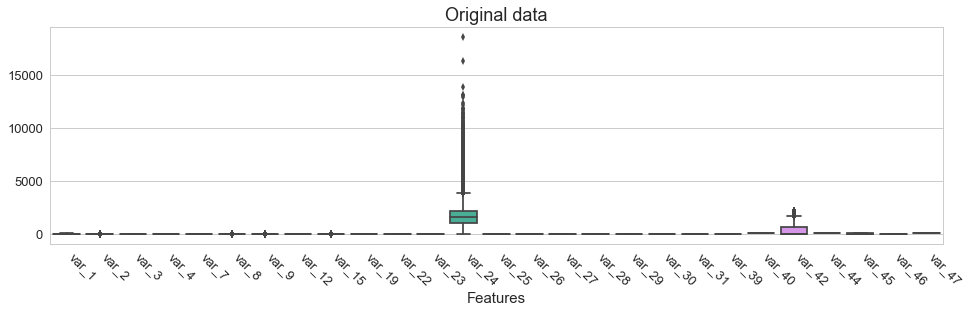

In [7]:
df_array = df[df.columns[:-1]].values
plt.figure(figsize=(16,4))
ax = sns.boxplot(data=df_array)
ax.set_xlabel('Features', fontsize = 15)
ax.set_xticklabels(df.columns.values, rotation = -45, ha='left')
ax.tick_params(labelsize=13)
ax.set_title('Original data', fontsize=18)
sns.plt.show()

The feature values are dominated by 'var_24' and, less significantly, by 'var_42'. These values need to be scaled to otherwise they will bias the classification algorithm. We observe also that these features are not normallly distributed around the mean value.

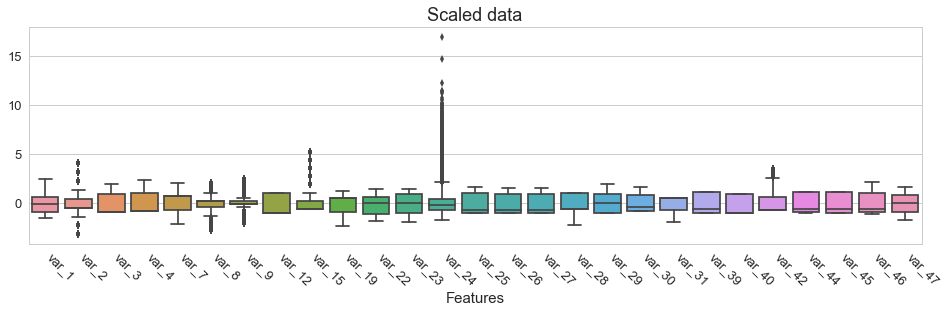

In [8]:
# Scale data
standard_scaler = preprocessing.StandardScaler()
scaled_array = standard_scaler.fit_transform(df_array)
new_array = np.column_stack([scaled_array, df.education.values])
df_new = pd.DataFrame(new_array, columns=df.columns)
# Box plot
plt.figure(figsize=(16,4))
ax = sns.boxplot(data=scaled_array)
ax.set_xlabel('Features', fontsize = 15)
ax.set_xticklabels(df.columns.values, rotation = -45, ha='left')
ax.tick_params(labelsize=13)
ax.set_title('Scaled data', fontsize=18)
sns.plt.show()

The data pre-processing applied in 2.1 and 2.2 is summarized into a function in order to apply it efficiently also the the test data

In [9]:
# Put all this into a function
def preprocess(df, k):
    # Add column names
    col_num = df.shape[1]
    col_names = ['var_%d' % n for n in range(col_num-1)]
    col_names.append('education')
    df.columns = col_names
    col_names = np.array(col_names)
    # Find column with ratio of repeated values more than k
    flag = np.zeros(m)
    for i in range(len(col_names)):
        flag[i]=df[col_names[i]].value_counts().max()        
    flag = flag>k*df.shape[0]
    # Eliminate also 'var_0' as it is just an increasing index
    flag[0]=True
    drop_columns = col_names[flag]
    df.drop(drop_columns, axis=1, inplace=True)
    # Convert categorical data into numbers
    col_names = np.array(df.columns)
    mask_c = np.invert(np.in1d(col_names, col_names_n))
    col_names_c = col_names[mask_c]
    for col_name in col_names_c[:-1]:
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
    # Scale data
    df_array = df[df.columns[:-1]].values
    standard_scaler = preprocessing.StandardScaler()
    scaled_array = standard_scaler.fit_transform(df_array)
    return scaled_array

### 2.3 Explore and transform target education classes
The item frequency of the target variable is plotted to examine the balancing between the different classes

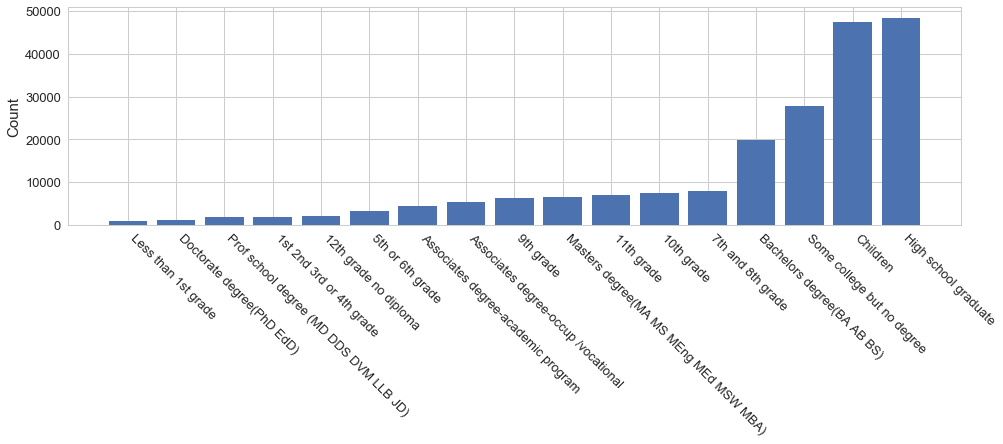

Number of classes:  17


In [10]:
yFreq = scipy.stats.itemfreq(df['education'].values) 
yFreq = yFreq[np.argsort(yFreq[:,1])]
yLabels = yFreq[:,0]
# Class frequency plot
fig_1 = plt.figure(figsize=(16,4))
x_bar = np.arange(len(yLabels))
ax1 = fig_1.add_subplot(111)
ax1.bar(x_bar, yFreq[:,1])
ax1.set_ylabel('Count', fontsize = 15)
ax1.set_xticks(x_bar)
ax1.set_xticklabels(yLabels, rotation=-45, ha='left')
ax1.tick_params(labelsize=13)
plt.show()
# Total number of classes
print('Number of classes: ', len(yLabels))

The target classes are highly unbalanced and too specific, especially for the grades levels, which can dcrease the performances of a classification algorithm. A preliminary test with a Random Forest classifier produced an overall accuracy 0.55, which was not improving by increasing the number of estimators.

The original levels of education are binned into new larger classes defined as follows:
- Grade: all grade levels 
- High school: people which finished high school but not university
- University: all the degrees - above high school

The class 'Children' is not tra as it is not representing a level of education. 
Trying different grouping strategies (for instance dividing into undergraduate and potgraduate) didn't improve the accuracy of the Random Forest preliminary test classifier

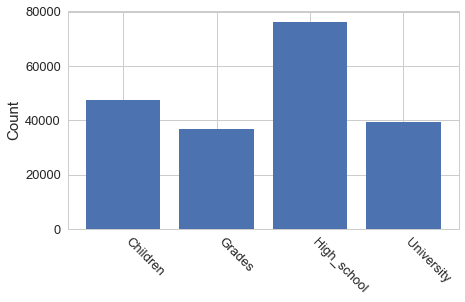

In [11]:
# Reduced education categories
grades = ['Less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade','7th and 8th grade', '9th grade', '10th grade', '11th grade', '12th grade no diploma']
university = ['Associates degree-academic program', 'Associates degree-occup /vocational', 'Bachelors degree(BA AB BS)', 'Doctorate degree(PhD EdD)', 'Masters degree(MA MS MEng MEd MSW MBA)', 'Prof school degree (MD DDS DVM LLB JD)']
high_school = ['High school graduate', 'Some college but no degree' ]
# apply new categories in new column
df['New_education'] = df.education
df['New_education'] = df.New_education.apply(lambda x: 'Grades' if x in grades else x)
df['New_education'] = df.New_education.apply(lambda x: 'University' if x in university else x)
df['New_education'] = df.New_education.apply(lambda x: 'High_school' if x in high_school else x)
classes = pd.unique(df.New_education.ravel())
# print('New classes: ', classes)
# Extract output array y_new
y_new = df['New_education'].values
y_newFreq = scipy.stats.itemfreq(y_new) 
y_newLabels = y_newFreq[:,0]
# Plot new frequencies
fig_1 = plt.figure(figsize=(7,4))
ax1 = fig_1.add_subplot(111)
x_bar = np.arange(len(y_newLabels))
ax1.bar(x_bar, y_newFreq[:,1])
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticks(x_bar)
ax1.set_xticklabels(y_newLabels, rotation=-45, ha='left')
ax1.tick_params(labelsize=13)
plt.show()
le = preprocessing.LabelEncoder()
le.fit(y_new)
y_new = le.transform(y_new)

By using this variable transformation the number of target classes are reduced from 17 to 4, and the balancing between the new classes is improved. The overal accuracy of the preliminary classification is increased to 0.71, as it will be shown later.

A function is defined to transform the classes also in the test set

In [12]:
# Define a function that reduces the classes to use also with the test set
def new_classes(df):
    # Reduced education categories
    grades = ['Less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade','7th and 8th grade', '9th grade', '10th grade', '11th grade', '12th grade no diploma']
    university = ['Associates degree-academic program', 'Associates degree-occup /vocational', 'Bachelors degree(BA AB BS)', 'Doctorate degree(PhD EdD)', 'Masters degree(MA MS MEng MEd MSW MBA)', 'Prof school degree (MD DDS DVM LLB JD)']
    high_school = ['High school graduate', 'Some college but no degree' ]
    # Apply new categories in new column
    df['New_education'] = df.education
    df['New_education'] = df.New_education.apply(lambda x: 'Grades' if x in grades else x)
    df['New_education'] = df.New_education.apply(lambda x: 'University' if x in university else x)
    df['New_education'] = df.New_education.apply(lambda x: 'High_school' if x in high_school else x)
    return df

## Step 3: Reduce the number of features and the number of rows in the data set

A preliminary run with a Random Forest classifier is done on the test set with aims of:
- find the most significant features and reject the redundant ones
- find the number of rows (observations) which is sufficent to train the classifier

The steps above are beneficial not only for reducing the time needed for optimising the parameters if the classifier, but also for a more clear visualisation of the data. 

Optimizing the classifier parameters in the original data set was too much computational expensive for both the original data set and with the reduced number of features. Reduction of the number of data was needed to run the classifier in a reasonable time in a MacBook Pro 2.7 GHz with 8 GB RAM. 

In [13]:
X = scaled_array
y = y_new
# Build a basic Random Forest classifier with 50 decision trees
rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

The relative importance of the features is obtained from the random forest trained classifier. This approached is preferred over PCA because the latter creates a new feature space, and the original features are lost.

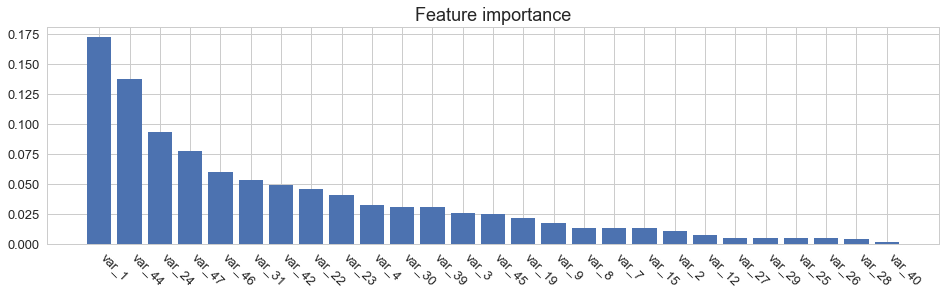

In [14]:
# Find feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
fig_1 = plt.figure(figsize=(16,4))
x_bar = np.arange(X.shape[1])
ax1 = fig_1.add_subplot(111)
ax1.bar(x_bar, importances[indices])
ax1.set_xticks(x_bar)
ax1.set_xticklabels(df.columns[indices], rotation=-45, ha='left')
ax1.tick_params(labelsize=13)
ax1.set_title('Feature importance', fontsize=18)
plt.show()

To select the optimum number of features the accuracy of the classifier is evaluated by splitting the data into a traing set and a test set and considering a different number of features

In [15]:
# Select first n features and split the data into 30% test and 70% training
n_features = 8
X_train, X_test, y_train, y_test = train_test_split(X[:,indices[:n_features]], y, test_size=0.3, random_state=0)
rf.fit(X_train, y_train)
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train) 
print("Overall Accuracy on y_test with full data set:", round(metrics.accuracy_score(y_test, pred_test),4))
# Evaluate accuracy with a reduced number of features
# N = 5 # reduced number to speed up computations
N = 10
accuracy = np.zeros(N)
# # N = len(accuracy)
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X[:,:(i+1)], y, test_size=0.3, random_state=0)
    rf.fit(X_train, y_train)
    accuracy[i]=round(metrics.accuracy_score(y_test, rf.predict(X_test)),2)

Overall Accuracy on y_test with full data set: 0.7204


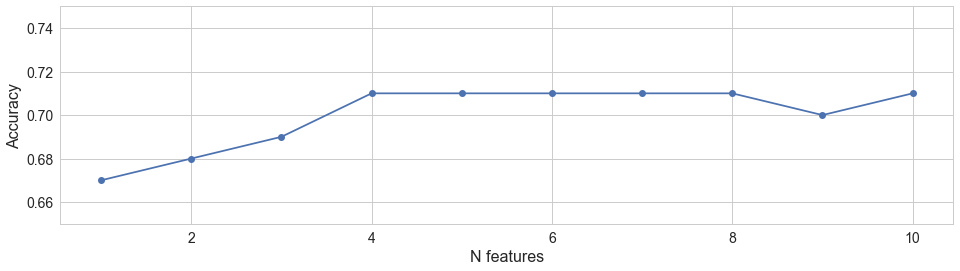

In [16]:
fig_1 = plt.figure(figsize=(16,4))
ax1 = fig_1.add_subplot(111)
ax1.plot(range(1,N+1), accuracy,'o-')
ax1.set_xlabel('N features', fontsize=16)
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_ylim(0.65, 0.75)
ax1.tick_params(labelsize=14)
plt.show()

Consindering the plot of Accuracy vs N. features and the Feature importance the optimum number of features to keep is set equal to 8

In [17]:
# Select a reduced number of features in training data
n_features = 8
X_train = X[:,indices[:n_features]]
y_train = y

To evaluate the number of data which are sufficient to train the model a training curve in terms of accuracy vs number of data needs to be produced. A function to plot the training curve is defined below 

In [18]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize = 14)
    plt.ylabel("Score", fontsize = 14)
    plt.tick_params(labelsize = 13)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.5,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.5, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc=4, fontsize = 13)
    return plt.show()

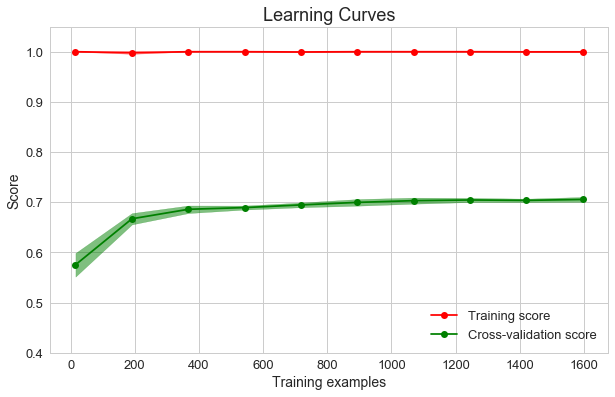

In [19]:
title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# Plot learning curves calculated with up to 0.01 size of the data set
plot_learning_curve(rf, title, X_train, y_train, (0.4, 1.05), cv=cv, n_jobs=-1, 
                    train_sizes=np.linspace(.0001, 0.01, 10))



The learning curves shows that the accuracy on the cross-validation test set stabilizes after 1000 training samples. It is observed also that the accuracy on the training set is near to 1 which suggests overfitting. This is not surprising given that the maximum depth of the tree and maximum number of leaf nodes are left uncontrolled.

The function below is defined to downsample uniformly the data set to a certain ratio.

In [20]:
# Downsample data set to decrease computational time
def downsample(X, ratio):
    n_init = X.shape[0]
    n_new = int(n_init*ratio)
    mask_new = np.random.choice(n_init, n_new)
    return X[mask_new,:]

## Step 4: Visualise the reduced data set

Visualisation of the original data set conveyed very little insight given the large number of features and classes in teh target variable. Better understanding is achieved using the reduced data set, as well as a decrease in the computational time needed to plot the data.

In [21]:
# Select a reduced number of features and downsample the training set for plotting data
n_features = 10
# Donwsample data
data = downsample(np.hstack((X[:,indices[:n_features]], le.inverse_transform(y)[:,None])), 0.05)
X_plot = data[:,:-1]
y_plot = data[:,-1]
# Dataframe for data plot
df_plot = pd.DataFrame(data, columns=np.hstack((df.columns[indices[:n_features]],df.columns[-1])))

In [22]:
df_plot.head()

,var_1,var_44,var_24,var_47,var_46,var_31,var_42,var_22,var_23,var_4,New_education
0,-0.425542,-0.931947,-0.645897,-1.36019,1.59389,0.589025,1.12286,-1.58052,-1.91637,1.29329,University
1,-0.0221506,-0.931947,4.82426,1.42484,-0.866345,0.589025,-0.670255,-1.58052,-1.91637,-0.782235,Grades
2,-0.380721,1.15785,-1.39207,1.01727,-0.264953,0.589025,-0.632185,1.48257,1.46572,-0.574682,High_school
3,0.784632,-0.891758,-0.723199,-0.748843,-0.647657,0.589025,-0.670255,1.48257,1.46572,-0.782235,Grades
4,-1.45643,-1.01232,0.0401903,-0.477133,-1.08503,-1.90118,-0.670255,-1.05542,-0.950062,-0.782235,Children


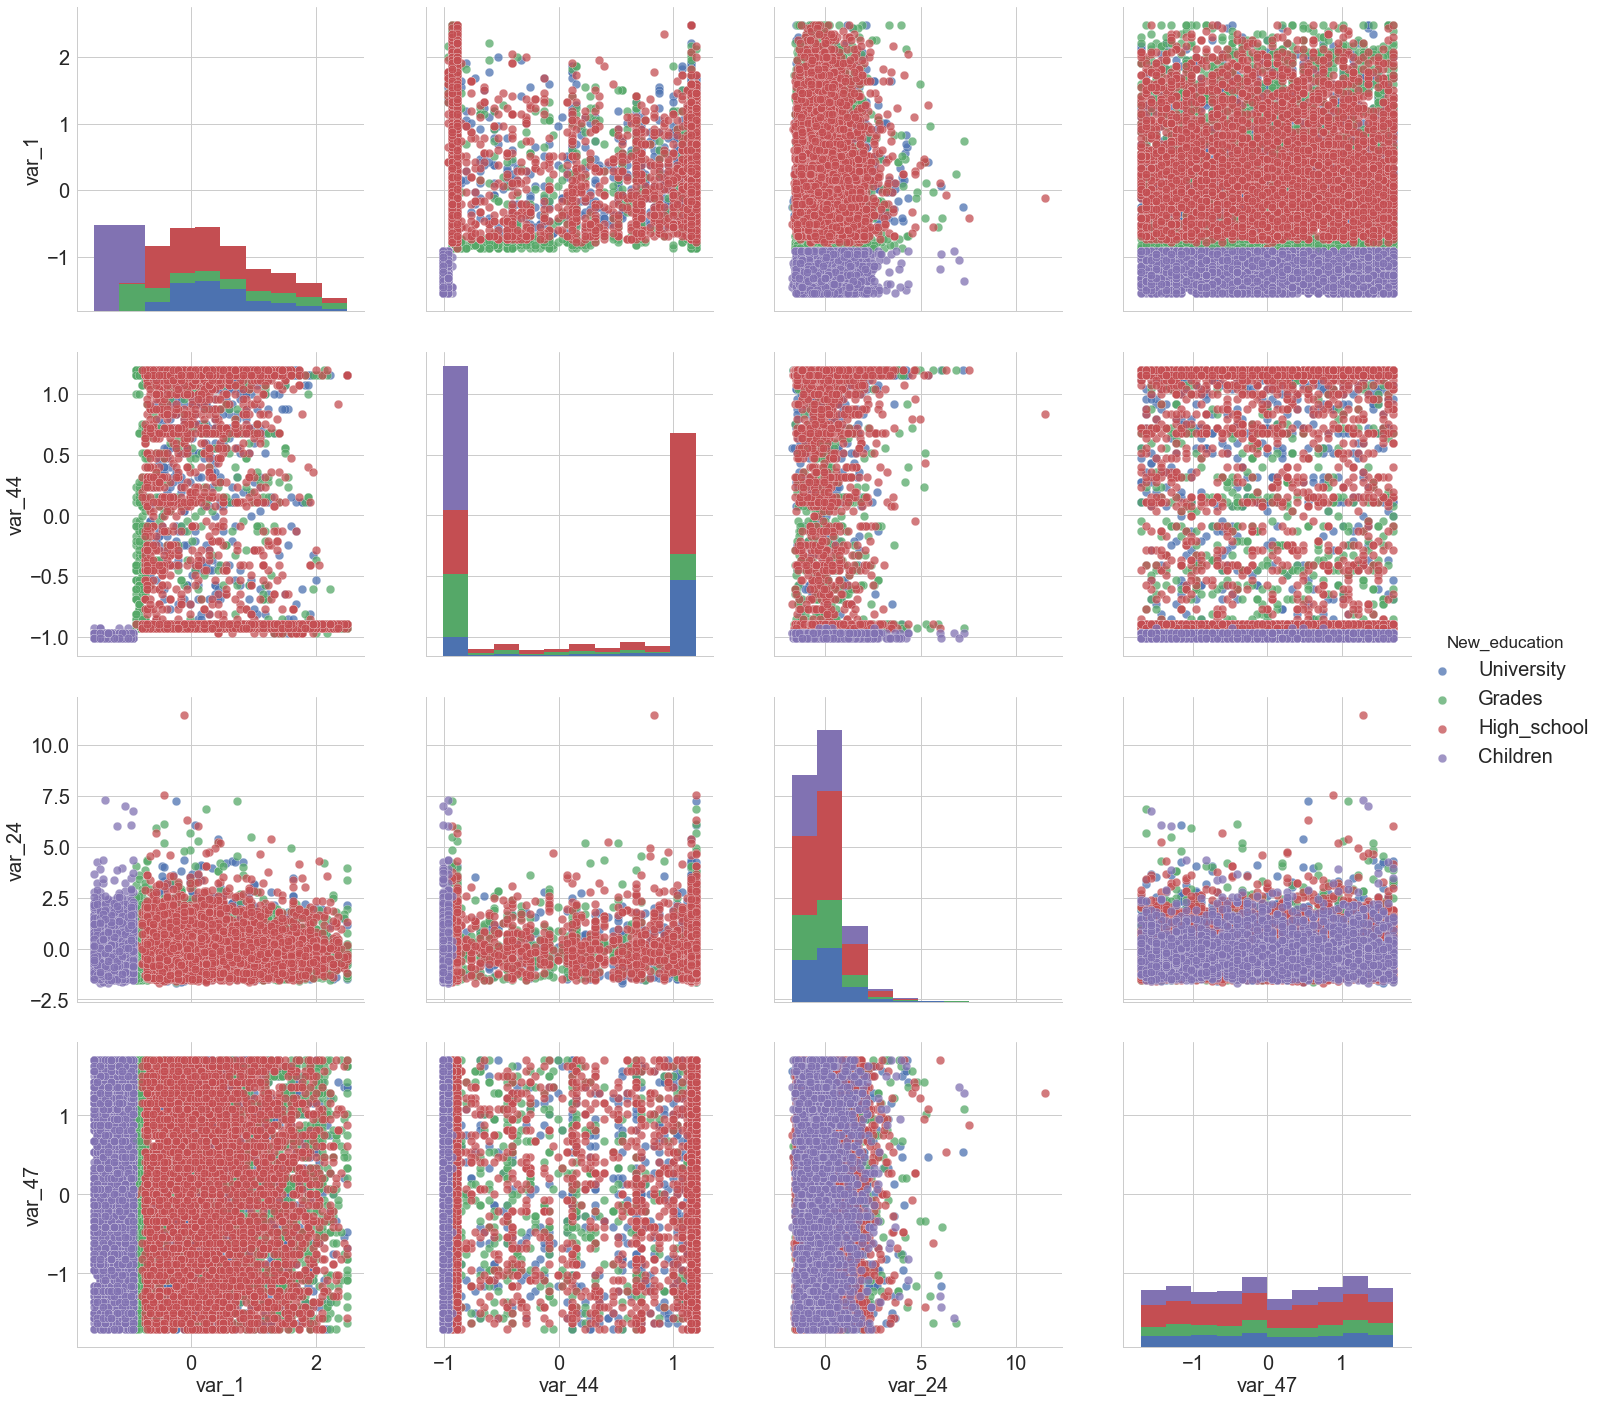

In [23]:
rc={'font.size': 20, 'axes.labelsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 20, 
    'ytick.labelsize': 20}
sns.set(rc=rc)
sns.set_style('whitegrid')
g = sns.PairGrid(df_plot, vars=df_plot.columns[:4], size=5, hue="New_education")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.75, s=75, edgecolor="white")
g.add_legend();

sns.plt.show()

The scatter plots and the histogram show that there is a net separation for the class 'children' especially across 'var_1', which explains the dominant importance in features plot shown above. For the other classes however, there is significant overlapping.

The correlation between the first 10 features is plotted below in a heatmap. There is a strong correlation between var_22 and var_23 and between var_4 and var_42, which might decrease the performance of the classifier (the strong correlation can be verified also in the pair grid plot above). However, as we have mentioned above, the classifier will be trained using the first 8 features, i.e. until var_22

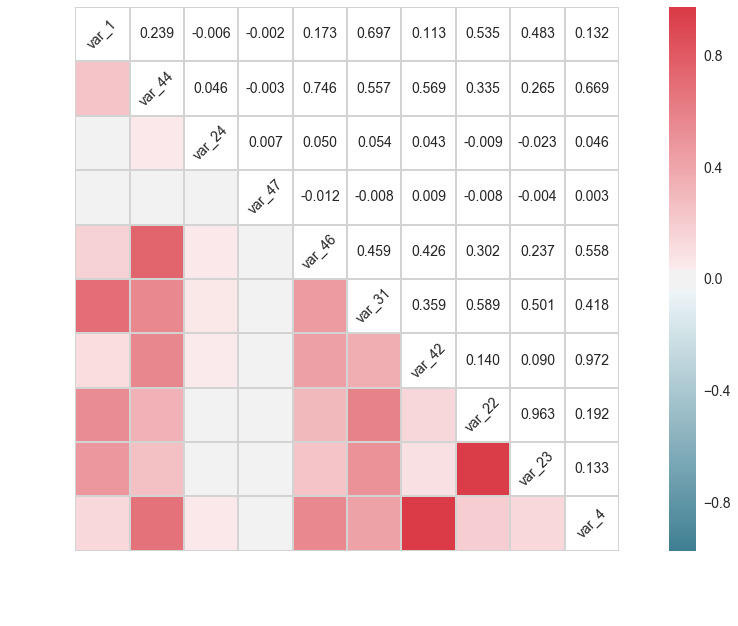

In [24]:
# Compute the correlation matrix for the first 10 features
corr = df_plot[df_plot.columns[:10]].astype(float).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], ha="center", va="center", rotation=45, fontsize=14)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, ha="center", va="center", fontsize=14)
ax.axis("off")
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.show()

## Step 5: Train, test, optimise and evaluate

Choose at least two algorithms to work with (single or ensemble models). Conduct the following with the objective of achieving good generalisation performance and minimising overfitting: 
- computation of evaluation metrics associated with accuracy, such as sensitivity, specificity, precision, overall accuracy.
- optimisation of parameters based on different scoring metrics.
- visualisation of model performance, e.g. ROC curve and associated metrics, e.g. area under curve (AUC).

In [25]:
# Downsample train data set to ratio of 0.1 and check accuracy
data = downsample(np.hstack((X_train, y_train[:,None])), 0.1)
X_train = data[:,:-1]
y_train = data[:,-1]
k_fold = KFold(len(y_train), n_folds=5, shuffle=True, random_state=1)
print('Cross validation score: ', round(cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=-1).mean(),3)) # 0.735

Cross validation score:  0.733


#### 5.1 Random Forest Classifier
As already anticipated the initial choice is a Random Forest classifier since it can deal with both numerical and categorical data, it is robust to outliers, and as all the decision tree methods it gives a simple interpretation of the results in the feature space. 

Training the classifier with the default hyperparameters led to overfitting on the trainig set (accuracy near to 1) as shown in the learning curves above. In this section the RF classifier is optimised and the appropriate score metrics is presented.

The choosen parameters to optmise are: 
- to increase the accuracy: the number of estimators
- to decrease overfitting: the max depth of the tree and the minumun number of samples in the leaf nodes

In [54]:
# Optimisation steps
# 1st: optimise n_etimators only
# 2nd: optimise max_depth with best_n_estimator fixed and reiterate n_estimators
# 3rd: optimise min_sample_leaf with other fixed and reiterate
n_estimators = np.arange(50, 301, 50)
max_depth    = np.arange(20, 61, 20)
min_samples_leaf = np.arange(5, 36, 10)
# parameters   = [{'n_estimators': n_estimators, 'max_depth': [20]}] # 1st
# parameters   = [{'n_estimators': [200], 'max_depth': max_depth}] # 2nd
parameters   = [{'n_estimators': [250], 'max_depth': [20], 'min_samples_leaf': min_samples_leaf}] # 3rd
# parameters   = [{'n_estimators': [250], 'max_depth': max_depth, 'min_samples_leaf': [5]}]
gridCV = GridSearchCV(RandomForestClassifier(max_features= 'sqrt'), param_grid=parameters, cv=5, n_jobs=-1)
gridCV.fit(X_train, y_train)
# Print the optimal parameters
best_n_estim = gridCV.best_params_['n_estimators'] # 250
best_max_depth = gridCV.best_params_['max_depth'] # 20
best_min_samples = gridCV.best_params_['min_samples_leaf'] # 5
print("Best parameters: n_estimators=", best_n_estim)
print("Best parameters: max_depth=", best_max_depth)
print("Best parameters: min_samples_leaf=", best_min_samples)
print("Best accuracy", gridCV.best_score_)

Best parameters: n_estimators= 250
Best parameters: max_depth= 20
Best parameters: min_samples_leaf= 5
Best accuracy 0.7319657382858117


Preprocess the test data set in the same way as for the train data set, using the functions defined above

In [26]:
# test data
df_test = pd.read_csv(fileTest, header=None, skipinitialspace=True)
X_test = preprocess(df_test, 0.75)
# Select reduced features
n_features = 8
X_test = X_test[:,indices[:n_features]]
# Test function   
df_test  = new_classes(df_test)
y_test = df_test['New_education'].values
y_test = le.transform(y_test)
# Subsample test set
data = downsample(np.hstack((X_test, y_test[:,None])), 0.1)
X_test = data[:,:-1]
y_test = data[:,-1]
print(X_test.shape)
print(y_test.shape)

(9976, 8)
(9976,)


Verify model performance on the test set with the best parameters 

In [37]:
# Test classifier with best parameters
best_n_estim = 100
best_min_samples = 20
best_max_depth = 40
rf = RandomForestClassifier(n_estimators=best_n_estim, min_samples_leaf=best_min_samples, max_depth=best_max_depth,
                            random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train) 
print(metrics.classification_report(y_test, pred_test))
print('Classes: ', le.classes_)
print("Overall Accuracy test:", round(metrics.accuracy_score(y_test, pred_test),3))
print("Overall Accuracy train:", round(metrics.accuracy_score(y_train, pred_train),3))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2346
        1.0       0.68      0.38      0.49      1796
        2.0       0.60      0.83      0.70      3809
        3.0       0.70      0.46      0.55      2025

avg / total       0.73      0.71      0.70      9976

Classes:  ['Children' 'Grades' 'High_school' 'University']
Overall Accuracy test: 0.714
Overall Accuracy train: 0.758


The classification report shows that the model is able to classify 100% of the class Children while it perform less well for the other classes. This is not surprising as we have already observed from the scatter plots that Children was well separated from the other classes, while there was significant overlap between the other classes.

While the precision on Grades and University is reasonable, the recall is a quite disappointing. On the other hand High_school has a good recall, but an approximate precision. 

The overall accuracy (the fraction of correct predictions) on the test set is 0.71, while on the train set is 0.76. Before controlling the max_depth and the min_samples_leaf the accuracy on the train set was 1.0 due to overfitting. Optimising the parameters decreased the overfitting on the train set but didn't improve significantly the performance on the test set.

The function below compute the ROC and the AUC for the different classes, as well as the unweighted average across all the prediction (micro-average). The True Positive 

In [46]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#example-model-selection-plot-roc-py
def plot_roc(X_train, y_train, X_test, y_test, clf, n_classes, plot_roc=True):
    # Binarize output
    y_test = label_binarize(y_test, classes=np.arange(n_classes, dtype=int))
    y_train = label_binarize(y_train, classes=np.arange(n_classes, dtype=int))
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(clf)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot all ROC curves
    if plot_roc == True:
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2)
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkseagreen'])
        for i, color in zip(range(n_classes), colors):
            ax.plot(fpr[i], tpr[i], color=color, lw=2,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(y_newLabels[i], roc_auc[i]))
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc="lower right", fontsize=14)
        plt.show()
    return fpr["micro"], tpr["micro"]

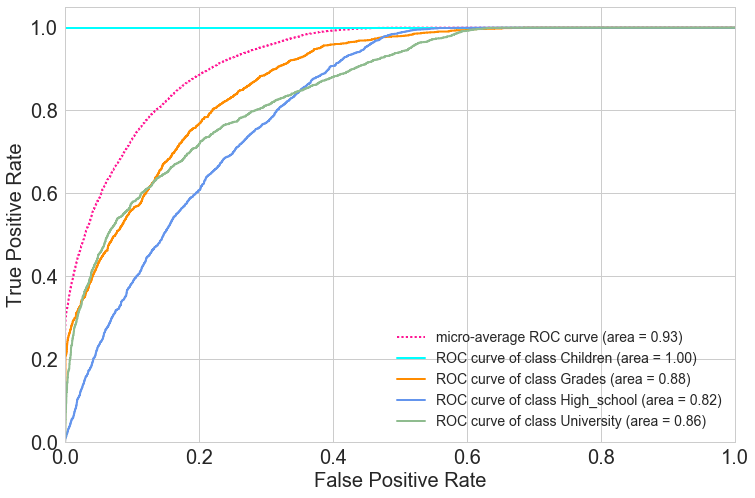

In [47]:
fpr, tpr = plot_roc(X_train, y_train, X_test, y_test, rf, 4, plot_roc=True)

The performance given in terms of True Positive Rate (TPR) vs False Positive Rate (FPR) shows good results with an average AUC of 0.93. 

#### 5.2 Gradient Boost Classifier
After the Random Forest classifier the performance of the Gradient Boost Classifier is evaluated. While the RF is based on bagging (bostrapping aggregating) the GB is based on boosting, i.e. sequential optimisation of the parameters in decision tree learners. GB is known for having better performances than RF in complex data sets, however it is more computationally expensive than RF and the number of paramaters to optimise is larger. 

In particular the learning_rate [0,1] controls the overfitting of the model by shrinking the steps during the minimisation of the target function. The subsample [0,1] defines the fraction of samples to be used for fitting the individual base learners.

In [48]:
# Define a Gradient Boost Classifier
gdb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.1, max_depth = 20, random_state=1)
gdb.fit(X_train, y_train)
pred_test = gdb.predict(X_test)
pred_train = gdb.predict(X_train) 
print(metrics.classification_report(y_test, pred_test))
print("Overall Accuracy test:", round(metrics.accuracy_score(y_test, pred_test),3))
print("Overall Accuracy train:", round(metrics.accuracy_score(y_train, pred_train),3))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2346
        1.0       0.57      0.46      0.51      1796
        2.0       0.60      0.75      0.66      3809
        3.0       0.61      0.43      0.50      2025

avg / total       0.69      0.69      0.68      9976

Overall Accuracy test: 0.69
Overall Accuracy train: 1.0


Parameter optimization requires more time than for the RF classifier and therefore is exectuted step by step as suggested in https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

1st step: number of estimators

In [52]:
# 1. Tune best num estimators with some initial parameters to optimise
parameters_1 = {'n_estimators':np.arange(90,151,30)}
gridCV = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = parameters_1, n_jobs=-1, cv=3)
gridCV.fit(X_train, y_train)
# Print the optimal parameters
best_n_estim = gridCV.best_params_['n_estimators'] # 120
print("Best parameters: n_estimators=", best_n_estim)
print("Best accuracy", round(gridCV.best_score_,3)) # 0.732

Best parameters: n_estimators= 120
Best accuracy 0.732


2nd step: max_depth and min_sample_split. 
The min_sample_split defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. It is used to control over-fitting.

In [55]:
# 2. Tune max_depth and min_samples_split
parameters_2 = {'max_depth':np.arange(2,10,2), 'min_samples_split':np.arange(200,601,100)}
gridCV = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=best_n_estim,learning_rate=0.1,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = parameters_2, n_jobs=-1, cv=5)
gridCV.fit(X_train, y_train)
# Print the optimal parameters
best_max_depth = gridCV.best_params_['max_depth'] # 6
best_min_samples_split = gridCV.best_params_['min_samples_split'] # 500
print("Best parameters: max_depth=", best_max_depth)
print("Best parameters: min_samples_split=", best_min_samples_split)
print("Best accuracy", gridCV.best_score_) # 0.734

Best parameters: max_depth= 6
Best parameters: min_samples_split= 500
Best accuracy 0.7336547666183848


3rd step: tuning different subsample values

In [57]:
# 3. Tune subsample
parameters_3 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gridCV = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=best_n_estim,max_depth=best_max_depth,min_samples_split=best_min_samples_split,learning_rate=0.1,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = parameters_3, n_jobs=-1, cv=5)
gridCV.fit(X_train, y_train)
# Print the optimal parameters
best_subsample = gridCV.best_params_['subsample'] # 0.6
print("Best parameters: subsample=", best_subsample)
print("Best accuracy", gridCV.best_score_) # 0.734

Best parameters: subsample= 0.6
Best accuracy 0.7338853164798044


4th step: tuning different learning rates

In [58]:
# 4. Tune learning_rate
parameters_4 = {'learning_rate':[0.001, 0.01, 0.1]}
gridCV = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=best_n_estim,max_depth=best_max_depth,min_samples_split=best_min_samples_split,learning_rate=0.1,min_samples_leaf=50,max_features='sqrt',subsample=best_subsample,random_state=10), 
param_grid = parameters_4, n_jobs=-1, cv=5)
gridCV.fit(X_train, y_train)
# Print the optimal parameters
best_learning_rate = gridCV.best_params_['learning_rate'] # 0.1
print("Best parameters: learning_rate=", best_learning_rate)
print("Best accuracy", gridCV.best_score_) 

Best parameters: learning_rate= 0.1
Best accuracy 0.7338853164798044


Evaluate the performance of the optimised Gradient Boost Classifier on the test data set and plot the ROC/AUC.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2346
        1.0       0.69      0.41      0.52      1796
        2.0       0.61      0.82      0.70      3809
        3.0       0.69      0.48      0.56      2025

avg / total       0.73      0.72      0.71      9976

Overall Accuracy test: 0.721
Overall Accuracy train: 0.746


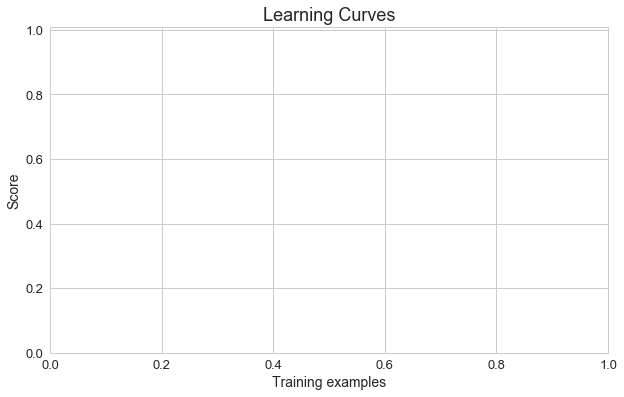

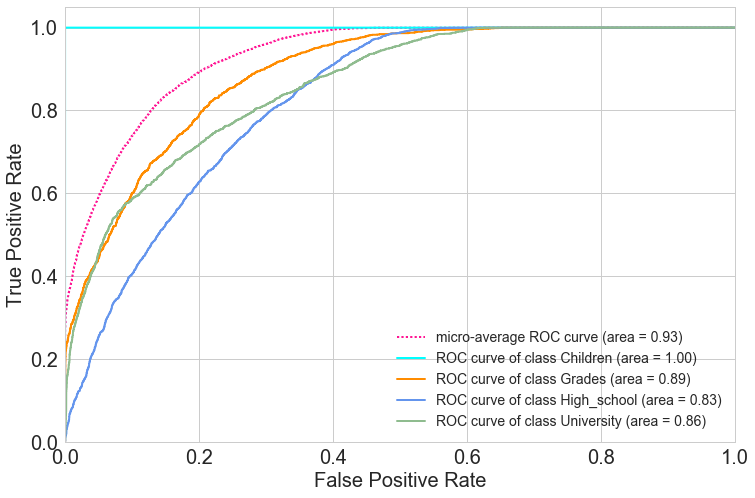

In [59]:
# Gradient Boost Classifier with optimised parameters
gdb = GradientBoostingClassifier(n_estimators=best_n_estim,max_depth=best_max_depth,min_samples_split=best_min_samples_split,learning_rate=best_learning_rate,min_samples_leaf=50,max_features='sqrt',subsample=best_subsample,random_state=10)
gdb.fit(X_train, y_train)
pred_test = gdb.predict(X_test)
pred_train = gdb.predict(X_train) 
print(metrics.classification_report(y_test, pred_test))
print("Overall Accuracy test:", round(metrics.accuracy_score(y_test, pred_test),3))
print("Overall Accuracy train:", round(metrics.accuracy_score(y_train, pred_train),3))
# Plot ROC and AUC
fpr, tpr = plot_roc(X_train, y_train, X_test, y_test, gdb, 4, plot_roc=True)

We observe a slight improvement on the overall accuracy on the test set prediction compared to the RF classifier, from 0.714 to 0.721, and in the recall. The micro-average on the other hand is the same as in for the Random Forest classifier.

#### 5.3 Neural Network
As a last method it was decided to test the performance of a Neural Network classifier on the data set. The underline idea is that a NN could potentially be more suitable to capture a pattern, and in particular improve the recall on the classes 'Grades' and 'University'.

Also in this case to reduced the computational time to a resonable level the training and testing is done on the same downsampled data set as for the RF and GB. As initial training parameters a batch size 100 and a number of epochs 10 are chosen. Since the data in the training set are near to 200,000, this corresponds to 2000 iterations per epoch.

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 100
nb_classes = 4
nb_epoch   = 10

Using Theano backend.


Given the reduced number of features and samples, a simple NN with only one hidden layer is built. The parameters of the network will be optimised later

In [28]:
# First, declare a model with a sequential architecture
model = Sequential()

# Then add a first layer with 4 nodes and n_features inputs
model.add(Dense(4, activation='relu', input_dim=n_features))

# Output layer with 4 categories (+using softmax))
model.add(Dense(4, activation='softmax'))

It is necessary to specify in keras that the classes are categorical data

In [29]:
y_train = np_utils.to_categorical(y_train,nb_classes)
y_test  = np_utils.to_categorical(y_test,nb_classes)

A Stochastic Gradient Descend optimizer is choosen with loss function represented by cross-entropy

In [30]:
# define to optimizer
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19952, 8)
(9976, 8)
(19952, 4)
(9976, 4)


In [32]:
model.fit(X_train,y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          verbose=2,
          validation_data = (X_test,y_test))

Train on 19952 samples, validate on 9976 samples
Epoch 1/10
0s - loss: 0.7880 - acc: 0.6428 - val_loss: 0.7089 - val_acc: 0.6638
Epoch 2/10
0s - loss: 0.6810 - acc: 0.6807 - val_loss: 0.6829 - val_acc: 0.6909
Epoch 3/10
0s - loss: 0.6642 - acc: 0.6972 - val_loss: 0.6770 - val_acc: 0.6960
Epoch 4/10
0s - loss: 0.6559 - acc: 0.7018 - val_loss: 0.6639 - val_acc: 0.6922
Epoch 5/10
0s - loss: 0.6523 - acc: 0.7017 - val_loss: 0.6623 - val_acc: 0.6924
Epoch 6/10
0s - loss: 0.6459 - acc: 0.7051 - val_loss: 0.6543 - val_acc: 0.6991
Epoch 7/10
0s - loss: 0.6443 - acc: 0.7045 - val_loss: 0.6521 - val_acc: 0.7022
Epoch 8/10
0s - loss: 0.6435 - acc: 0.7037 - val_loss: 0.6493 - val_acc: 0.7086
Epoch 9/10
0s - loss: 0.6391 - acc: 0.7039 - val_loss: 0.6429 - val_acc: 0.7061
Epoch 10/10
0s - loss: 0.6390 - acc: 0.7025 - val_loss: 0.6496 - val_acc: 0.7070


In [33]:
# Displaying the results
score = model.evaluate(X_test,y_test,show_accuracy=True,verbose=0) 
# print('Test score:', score[0])
print('Accuracy:', score[1]) # 0.707

Accuracy: 0.706996792302


/Users/francescobattocchio/py3/lib/python3.6/site-packages/keras/models.py:697: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


The hyperarameters if the NN are also tuned with the GridSearchCV method in skitlearn. This requires to use a Keras wrapper and to define the NN with the parameter to optimise inside a function that will be called 'create_model'. This is described in more detail here:
http://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In the first step the batch size is optimised

In [34]:
# Tune batch size
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(4, activation='relu', input_dim=n_features))
    model.add(Dense(4, activation='softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [50, 100, 150, 200]
nb_epoch = [10]
param_grid = dict(batch_size=batch_size, nb_epoch=nb_epoch)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1) # n_jobs = -1 interfere with theano training
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
grid_result.grid_scores_ # Best: 0.712108 using {'batch_size': 100, 'nb_epoch': 10}

Best: 0.708951 using {'batch_size': 100, 'nb_epoch': 10}


[mean: 0.69878, std: 0.00944, params: {'batch_size': 50, 'nb_epoch': 10},
 mean: 0.70895, std: 0.00811, params: {'batch_size': 100, 'nb_epoch': 10},
 mean: 0.69557, std: 0.02045, params: {'batch_size': 150, 'nb_epoch': 10},
 mean: 0.69612, std: 0.02605, params: {'batch_size': 200, 'nb_epoch': 10}]

In the third step the learn_rate of the SGD optimiser

In [35]:
# Optimise SGD parameters
def create_model(learn_rate=0.1, momentum=0.9):
    # create model
    model = Sequential()
    model.add(Dense(4, activation='relu', input_dim=n_features))
    model.add(Dense(4, activation='softmax'))
    optimizer = SGD(lr=learn_rate, momentum=momentum, decay=1e-6, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model
# create model
model = KerasClassifier(build_fn=create_model, nb_epoch=10, batch_size=100, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
# Search grid of parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1) # n_jobs = -1 interfere with theano training
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.grid_scores_ # Best: 0.715336 using {'learn_rate': 0.01}

Best: 0.705493 using {'learn_rate': 0.3}


[mean: 0.63362, std: 0.01997, params: {'learn_rate': 0.001},
 mean: 0.68389, std: 0.00558, params: {'learn_rate': 0.01},
 mean: 0.70203, std: 0.01613, params: {'learn_rate': 0.1},
 mean: 0.68991, std: 0.03245, params: {'learn_rate': 0.2},
 mean: 0.70549, std: 0.01401, params: {'learn_rate': 0.3}]

In the last step the number of neurons in the hidden layer

In [36]:
# Optimise number hidden units (neurons)
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=n_features))
    model.add(Dense(4, activation='softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model
# create model
model = KerasClassifier(build_fn=create_model, nb_epoch=10, batch_size=100, verbose=0)
# define the grid search parameters
neurons = [5, 10, 15, 20, 25]
param_grid = dict(neurons=neurons)
# Search grid of parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1) # n_jobs = -1 interfere with theano training
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.grid_scores_

Best: 0.715116 using {'neurons': 5}


[mean: 0.71512, std: 0.00518, params: {'neurons': 5},
 mean: 0.71226, std: 0.00419, params: {'neurons': 10},
 mean: 0.71226, std: 0.00474, params: {'neurons': 15},
 mean: 0.71166, std: 0.00527, params: {'neurons': 20},
 mean: 0.71406, std: 0.00211, params: {'neurons': 25}]

Evaluate the performance of the neural network with the optimised parameters

In [37]:
tuned_model = Sequential()
tuned_model.add(Dense(5, activation='relu', input_dim=n_features))
# Output layer with 4 categories 
tuned_model.add(Dense(4, activation='softmax'))
# define to optimizer
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
tuned_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
# Test the model
tuned_model.fit(X_train,y_train,
          batch_size=100,
          nb_epoch=10,
          verbose=2,
          validation_data = (X_test,y_test))
# Displaying the results
score = tuned_model.evaluate(X_test,y_test,show_accuracy=True,verbose=0) 
# print('Test score:', score[0])
print('Accuracy:', score[1]) # 0.711

Train on 19952 samples, validate on 9976 samples
Epoch 1/10
0s - loss: 0.7544 - acc: 0.6667 - val_loss: 0.6782 - val_acc: 0.6889
Epoch 2/10
0s - loss: 0.6581 - acc: 0.7017 - val_loss: 0.6603 - val_acc: 0.6964
Epoch 3/10
0s - loss: 0.6435 - acc: 0.7091 - val_loss: 0.6570 - val_acc: 0.7058
Epoch 4/10
0s - loss: 0.6352 - acc: 0.7111 - val_loss: 0.6427 - val_acc: 0.7077
Epoch 5/10
0s - loss: 0.6296 - acc: 0.7141 - val_loss: 0.6386 - val_acc: 0.7117
Epoch 6/10
0s - loss: 0.6273 - acc: 0.7116 - val_loss: 0.6362 - val_acc: 0.7071
Epoch 7/10
0s - loss: 0.6239 - acc: 0.7145 - val_loss: 0.6347 - val_acc: 0.7107
Epoch 8/10
0s - loss: 0.6232 - acc: 0.7142 - val_loss: 0.6350 - val_acc: 0.7061
Epoch 9/10
0s - loss: 0.6214 - acc: 0.7154 - val_loss: 0.6288 - val_acc: 0.7110
Epoch 10/10
0s - loss: 0.6203 - acc: 0.7157 - val_loss: 0.6305 - val_acc: 0.7113
Accuracy: 0.711307137177


/Users/francescobattocchio/py3/lib/python3.6/site-packages/keras/models.py:697: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


The final accuracy of the tuned neural network classifier is 0.711.

Among the methods investigated the accuracy is in descending order:
- Gradient Boost = 0.721
- Random Forest = 0.714
- Neural Network = 0.711

It should be stressed that the training, optimization and evaluation have been done in a data set which reduced in terms of features and number of observations, due to large computational time in the original data set. However, as we used the same set of data for all the 3 methods, this analysis is representative of the relative performance.

It was osbserved that 'var_24' is skew distributed and has a large number of outliers. A potential improvement which has not been tried could be to transform the variable or to eliminate the outliers and re-train the algorithms